### NGC 1275
http://tevcat.uchicago.edu/?mode=1;id=212</br>

https://ned.ipac.caltech.edu/byname?objname=NGC+1275&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [1]:
import matplotlib.pyplot as plt # A collection of command style functions

import numpy as np

from astropy import units as u
from astropy.units import  Quantity
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord

# from .core import 
from feupy.utils.string_handling import name_to_txt
from feupy.utils.units import Jy_to_erg_by_cm2_s
from feupy.catalog import CATALOG_REGISTRY
from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts

from feupy.plotters import generate_marker_set
from feupy.target import Target
from feupy.roi import ROI

from gammapy.utils.scripts import make_path

from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel
from gammapy.modeling import Fit

/home/napi-feu-red/miniconda3/envs/gammapy-1.1/lib/python3.9/site-packages/pydantic/_migration.py:290: UserWarning: `pydantic.utils:deep_update` has been removed. We are importing from `pydantic.v1.utils:deep_update` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(
/home/napi-feu-red/miniconda3/envs/gammapy-1.1/lib/python3.9/site-packages/pydantic/_migration.py:290: UserWarning: `pydantic.utils:deep_update` has been removed. We are importing from `pydantic.v1.utils:deep_update` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(


In [3]:
# from feupy.scripts.ipynb_to_gallery import convert_ipynb_to_gallery 

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt # A collection of command style functions

In [6]:
from astropy import units as u
from astropy.units import  Quantity
from astropy.coordinates import SkyCoord
from astropy.table import Table

from gammapy.utils.scripts import make_path
from gammapy.datasets import Datasets, FluxPointsDataset

from gammapy.estimators import FluxPoints
from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel
from gammapy.modeling import Fit

from feupy.utils.string_handling import name_to_txt
from feupy.catalog import CATALOG_REGISTRY
from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts
from feupy.plotters import generate_marker_set
from feupy.target import Target
from feupy.roi import ROI

from core import get_data_VizieR_byname

In [45]:
# source_name = 'Cen A'
source_name = 'Fornax A'

name_file = name_to_txt(source_name)
position = SkyCoord.from_name(source_name)

In [49]:
position

<SkyCoord (ICRS): (ra, dec) in deg
    (50.67412083, -37.2082)>

In [46]:
outdir = f"./{name_file}"
outdir_path = make_path(outdir)
outdir_path.mkdir(parents=True, exist_ok=True)

datasets_path = make_path(f"{outdir_path}/datasets/")
datasets_path.mkdir(parents=True, exist_ok=True)

figures_path = make_path(f"{outdir_path}/figures/")
figures_path.mkdir(parents=True, exist_ok=True)

data_path = make_path(f"./data/{outdir}")
data_path.mkdir(parents=True, exist_ok=True)

In [47]:
config = CounterpartsConfig()

config.general.outdir = outdir
config.general.datasets_file = f"{datasets_path}/datasets.yaml"
config.general.models_file = f"{datasets_path}/models.yaml"

In [53]:
catalog = CATALOG_REGISTRY.get_cls("4fgl")()
source = catalog[source_name]
print(source.info())


*** Basic info ***

Catalog row index (zero-based) : 802
Source name          : 4FGL J0322.6-3712e
Extended name        : Fornax A          
Associations     : Fornax A, 3FGL J0322.5-3721, 3FHL J0322.6-3712e
ASSOC_PROB_BAY   : --
ASSOC_PROB_LR    : --
Class1           : RDG  
Class2           :           
TeVCat flag      : N

*** Other info ***

Significance (100 MeV - 1 TeV)   : 18.400
Npred                            : 988.6

Other flags          : 4

*** Position info ***

RA                   : 50.670 deg
DEC                  : -37.210 deg
GLON                 : 240.167 deg
GLAT                 : -56.693 deg

Semimajor (68%)      : 0.0000 deg
Semiminor (68%)      : 0.0000 deg
Position angle (68%) : 0.00 deg
Semimajor (95%)      : 0.0000 deg
Semiminor (95%)      : 0.0000 deg
Position angle (95%) : 0.00 deg
ROI number           : 1183

*** Extended source information ***

Model form       : Map        
Model semimajor  : 0.3500 deg
Model semiminor  : 0.3500 deg
Position angle   : 0

In [54]:
table = Table.read(f'{data_path}/table_photandseds.csv')
table

No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,Upper limit of Flux Density,Lower limit of Flux Density,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
int64,str20,float64,str13,str19,float64,float64,float64,float64,float64,int64,str11,str2,str19,str30,str18,str92,str39,str56,str39,str163
1,0.01-1 TeV (Fermi),2.59e-12,+/-1.27E-12,erg/cm^2^/s,1.22e+26,2.12e-15,1.04e-15,1.04e-15,--,--,+/-1.04E-15,Jy,2017ApJS..232...18A,1 sigma,0.51 TeV,Broad-band measurement,050.669998 -37.209999 (J2000),From fitting to map,--,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
2,0.1-100 GeV (Fermi),6e-12,+/-1.2E-12,erg/cm^2^/s,1.21e+25,4.96e-14,9.92e-15,9.92e-15,--,--,+/-9.92E-15,Jy,2012ApJS..199...31N,1 sigma,50.05 GeV,Broad-band measurement,050.600 -37.292 (J2000),Modelled datum,--,From new raw data; NED frequency assigned to mid-point ofband in keV
3,2-10 keV (XMM),2.8e-13,--,erg/s/cm^2^,1.45e+18,1.93e-08,--,--,--,--,--,Jy,2011MNRAS.413.1206B,no uncertainty reported,6.00 keV,Broad-band measurement,050.672 -37.209 (J2000),Modelled datum,--,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
4,0.3-8 keV (XMM),2.4e-14,+/-0.7E-14,erg/s/cm^2^,1e+18,2.4e-09,7e-10,7e-10,--,--,+/-7.00E-10,Jy,2010ApJ...721.1702L,uncertainty,4.15 keV,Broad-band measurement,--,Modelled datum,Nuclear flux,From new raw data; NED frequency assigned to mid-point ofband in keV
5,0.3-8 keV (Chandra),1.592e-13,+/-0.64E-14,erg/s/cm^2^,1e+18,1.59e-08,6.4e-10,6.4e-10,--,--,+/-6.40E-10,Jy,2011ApJ...731...60G,uncertainty,4.15 keV,Broad-band measurement,03 22 41.7 +37 12 30 (J2000),Flux integrated from map,Nuclear flux,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
6,0.3-8 keV (Chandra),4.07e-13,--,erg/s/cm^2^,1e+18,4.07e-08,--,--,--,--,--,Jy,2011ApJS..192...10L,no uncertainty reported,4.15 keV,Broad-band measurement,03 22 41.707 -37 12 28.76 (J2000),Flux integrated from map,--,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,843 MHz (SUMSS),368.0,+/-11.6,milliJy,843000000.0,0.368,0.0116,0.0116,--,--,+/-1.16E-02,Jy,2008SUMSS.2.1.....:,uncertainty,843 MHz,Broad-band measurement,032241.40 -371225.5 (J2000),Flux integrated from map,--,From new raw data
292,843 MHz,169.0,+/-9 %,Jy,843000000.0,169.0,15.2,15.2,--,--,+/-1.52E+01,Jy,1992ApJS...80..137J,rms uncertainty,843 MHz,Broad-band measurement,032048.5 -372219 (B1950),Flux integrated from map,Article has map,From new raw data


In [55]:
datasets_VizieR = get_data_VizieR_byname(table)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

In [56]:
datasets = Datasets(datasets_VizieR)

In [57]:
xaxis_label = r'$\rm{E\ [TeV] }$'
xaxis_units = u.Unit('TeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e-22, 1e3] * u.TeV
ylim = [1e-16, 1e-8]

leg_place = dict(
    bbox_to_anchor = (1, 0.5), # Set legend outside plot
    ncol=1, 
#     loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

46 unique markers generated


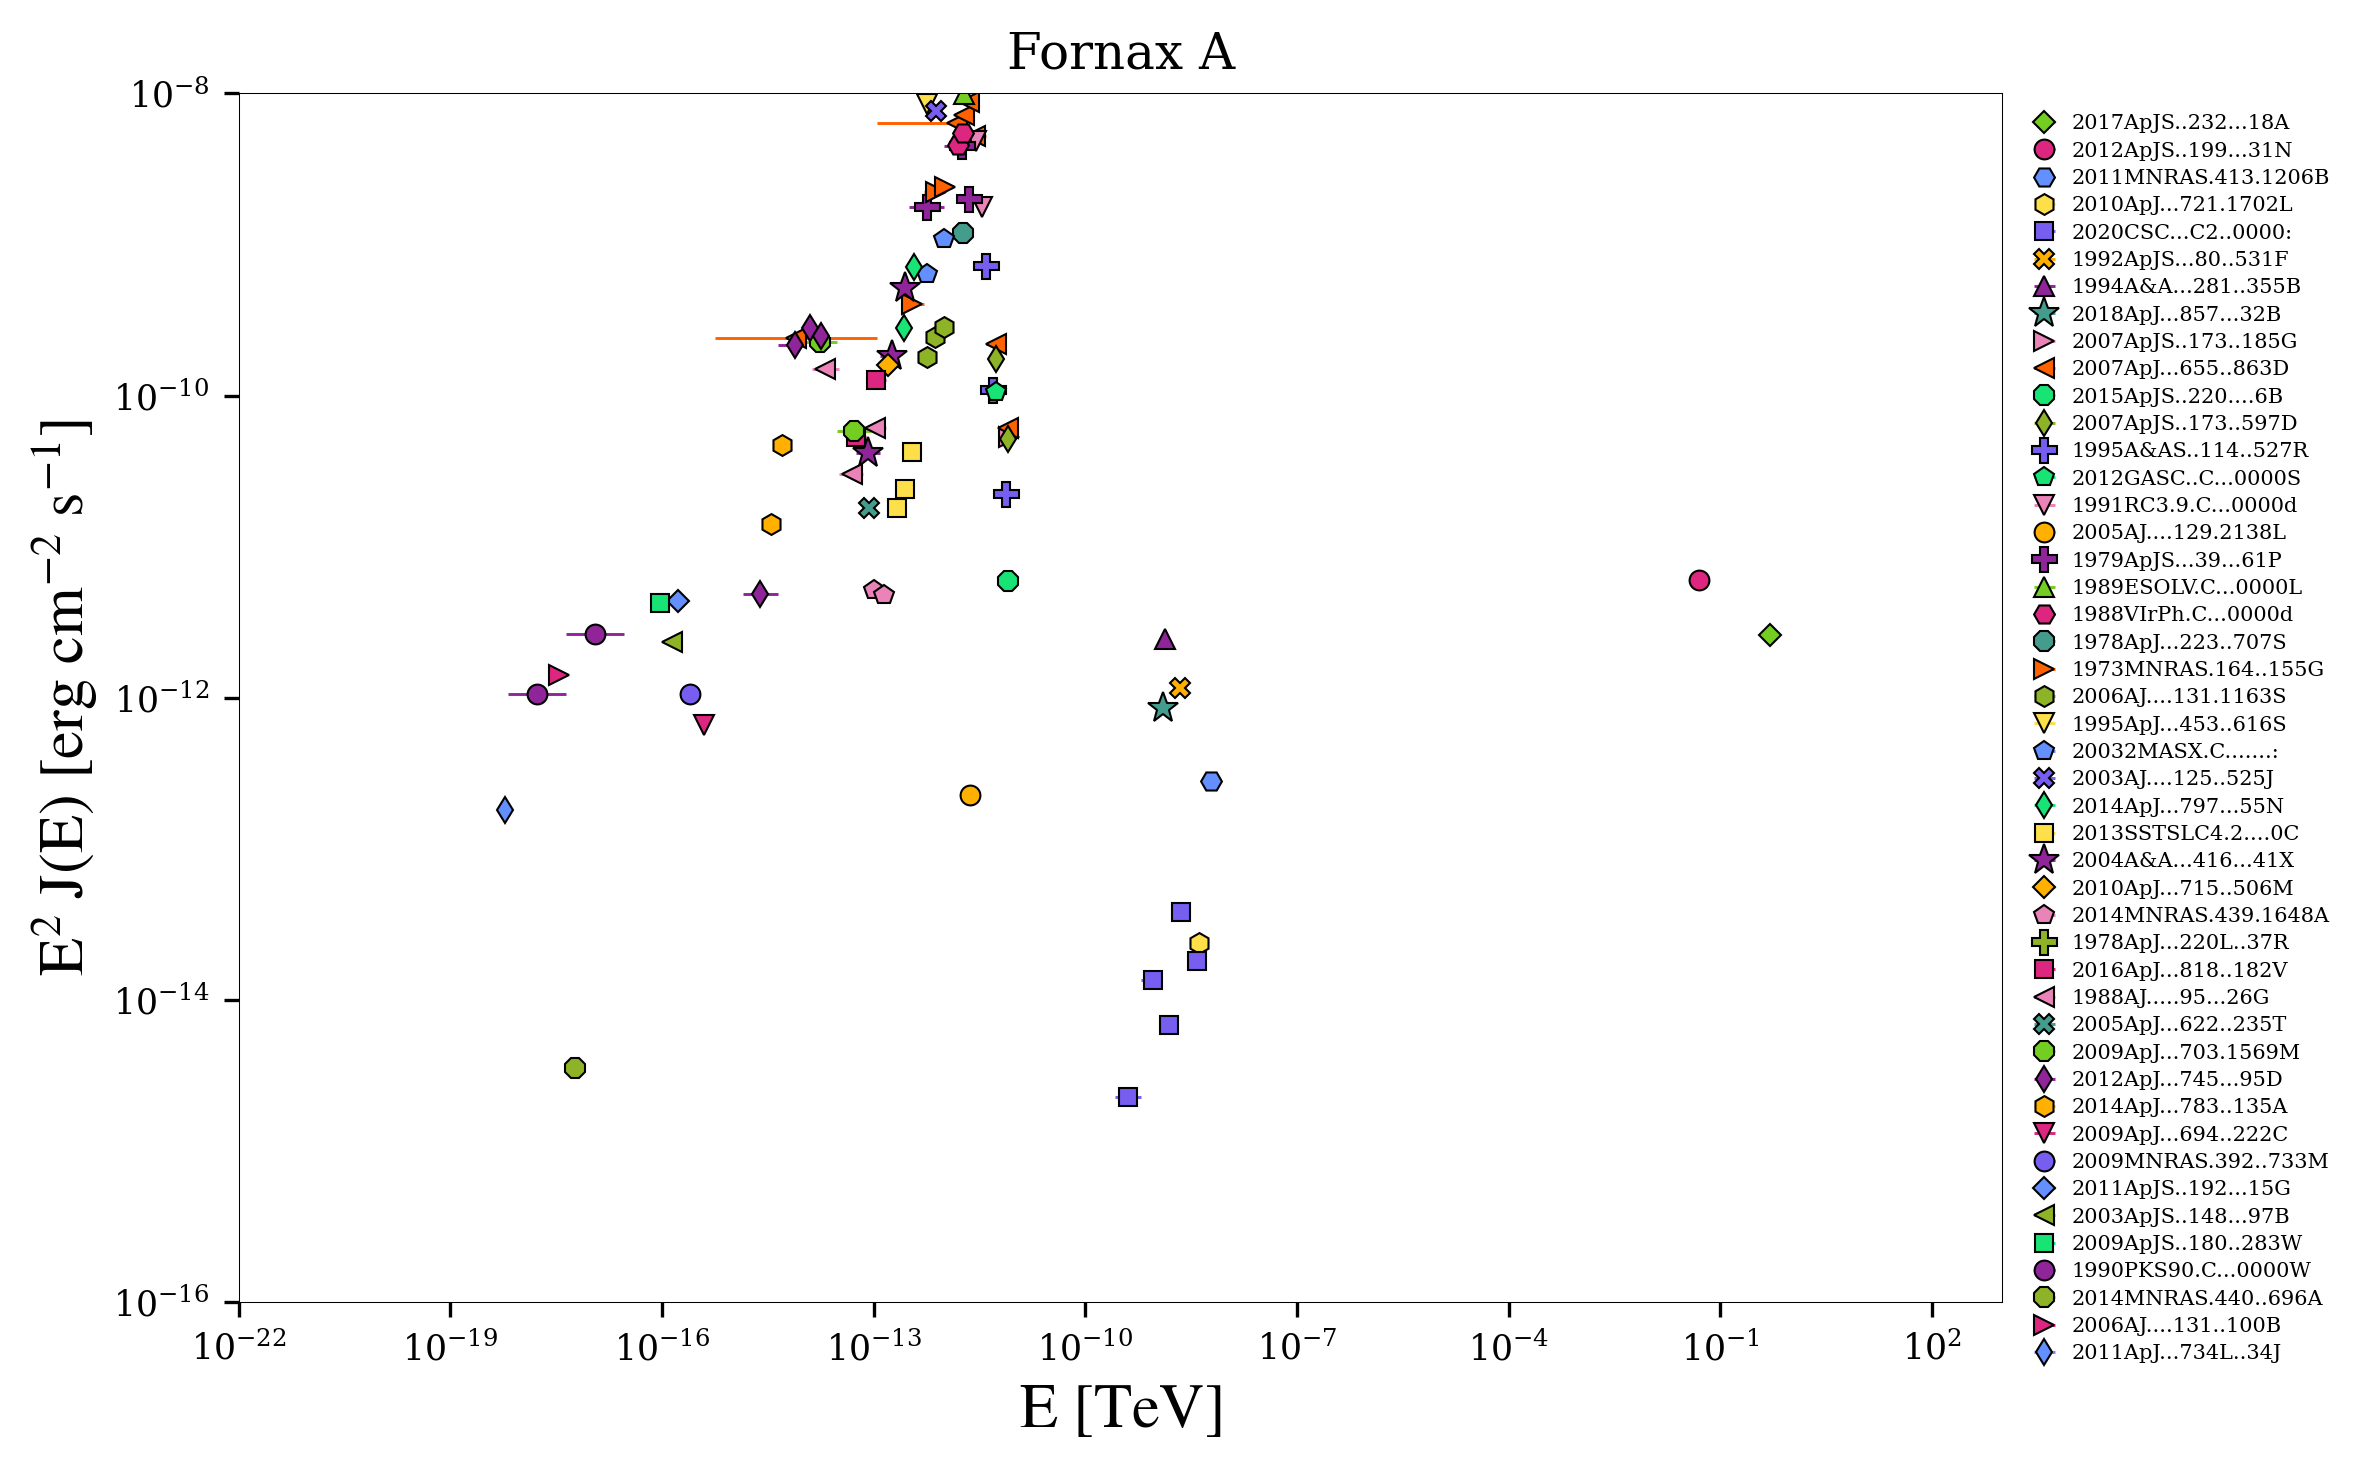

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 

    d.data.plot(
        label=d.name, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(loc='upper left', ncol=1, fontsize=5, bbox_to_anchor=(1,1))

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/flux_points_VizieR_{name_file}")
plt.show()


In [59]:
target = Target(
    name=source_name, 
    pos_ra=position.ra, 
    pos_dec=position.dec,
)

radius_roi = 0.5 * u.Unit("deg")

roi = ROI(target=target, radius=radius_roi)

config.roi = roi.dict
config.roi.catalogs = "all"

analysis = Counterparts(config)
analysis.run()


Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


SourceCatalogGammaCat:
    name: gamma-cat
    description: An open catalog of gamma-ray sources
    sources: 162

SourceCatalogHGPS:
    name: hgps
    description: H.E.S.S. Galactic plane survey (HGPS) source catalog
    sources: 78

SourceCatalog2HWC:
    name: 2hwc
    description: 2HWC catalog from the HAWC observatory
    sources: 40

SourceCatalog3FGL:
    name: 3fgl
    description: LAT 4-year point source catalog
    sources: 3034

SourceCatalog4FGL:
    name: 4fgl
    description: LAT 8-year point source catalog
    sources: 6659

SourceCatalog2FHL:
    name: 2fhl
    description: LAT second high-energy source catalog
    sources: 360

SourceCatalog3FHL:
    name: 3fhl
    description: LAT third high-energy source catalog
    sources: 1556

SourceCatalog3HWC:
    name: 3hwc
    description: 3HWC catalog from the HAWC observatory
    sources: 65

SourceCatalogExtraHAWC:
    name: extraHAWC
    description: extraHAWC catalog from the HAWC observatory
    sources: 8

SourceCatal

In [60]:
analysis.df_sep

,Source name,RA(deg),dec.(deg),Sep.(deg)
0,3FGL J0322.5-3721,50.642601,-37.358398,0.152278
1,4FGL J0322.6-3712e,50.669998,-37.209999,0.003744
2,3FHL J0322.6-3712e,50.669998,-37.209999,0.003744


In [61]:
# analysis.datasets.names

In [62]:
# analysis.write_datasets()
# analysis.write_models()

In [63]:
models = Models()
datasets = Datasets()

In [64]:
# path_dir = datasets_dir
# datasets_HE = Datasets.read(filename=f'{path_dir}/datasets.yaml', filename_models=f'{path_dir}/models.yaml')

datasets_HE = analysis.datasets.copy()
models.extend(datasets_HE.models)
datasets.extend(datasets_HE.copy())

In [65]:
xaxis_label = r'$\rm{E\ [MeV] }$'
xaxis_units = u.Unit('MeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

leg_place = dict(
    bbox_to_anchor = (1, 0.5), # Set legend outside plot
    ncol=1, 
#     loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

3 unique markers generated


In [66]:
spectral_model = datasets_HE.models[1].spectral_model

model_fit = SkyModel(
#     spatial_model=spatial_model,
    spectral_model=spectral_model,
    name="model-fit",
)
models.append(model_fit)
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.0537e+00,,5.324e-02,nan,nan,False,False,
spectral,amplitude,1.8248e-13,MeV-1 s-1 cm-2,1.314e-14,nan,nan,False,True,
spectral,reference,1.7758e+03,MeV,0.000e+00,nan,nan,True,False,


In [67]:
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.0537e+00,,5.324e-02,nan,nan,False,False,
spectral,amplitude,1.8248e-13,MeV-1 s-1 cm-2,1.314e-14,nan,nan,False,True,
spectral,reference,1.7758e+03,MeV,0.000e+00,nan,nan,True,False,


In [68]:
datasets.models = model_fit
fitter = Fit()
result_fit = fitter.run(datasets=datasets)
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.1479e+00,,4.432e-02,nan,nan,False,False,
spectral,amplitude,1.7451e-13,MeV-1 s-1 cm-2,1.133e-14,nan,nan,False,True,
spectral,reference,1.7758e+03,MeV,0.000e+00,nan,nan,True,False,


In [69]:
result_fit.success

True

In [70]:
datasets.names

['3FGL J0322.5-3721', '4FGL J0322.6-3712e', '3FHL J0322.6-3712e']

In [71]:
energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

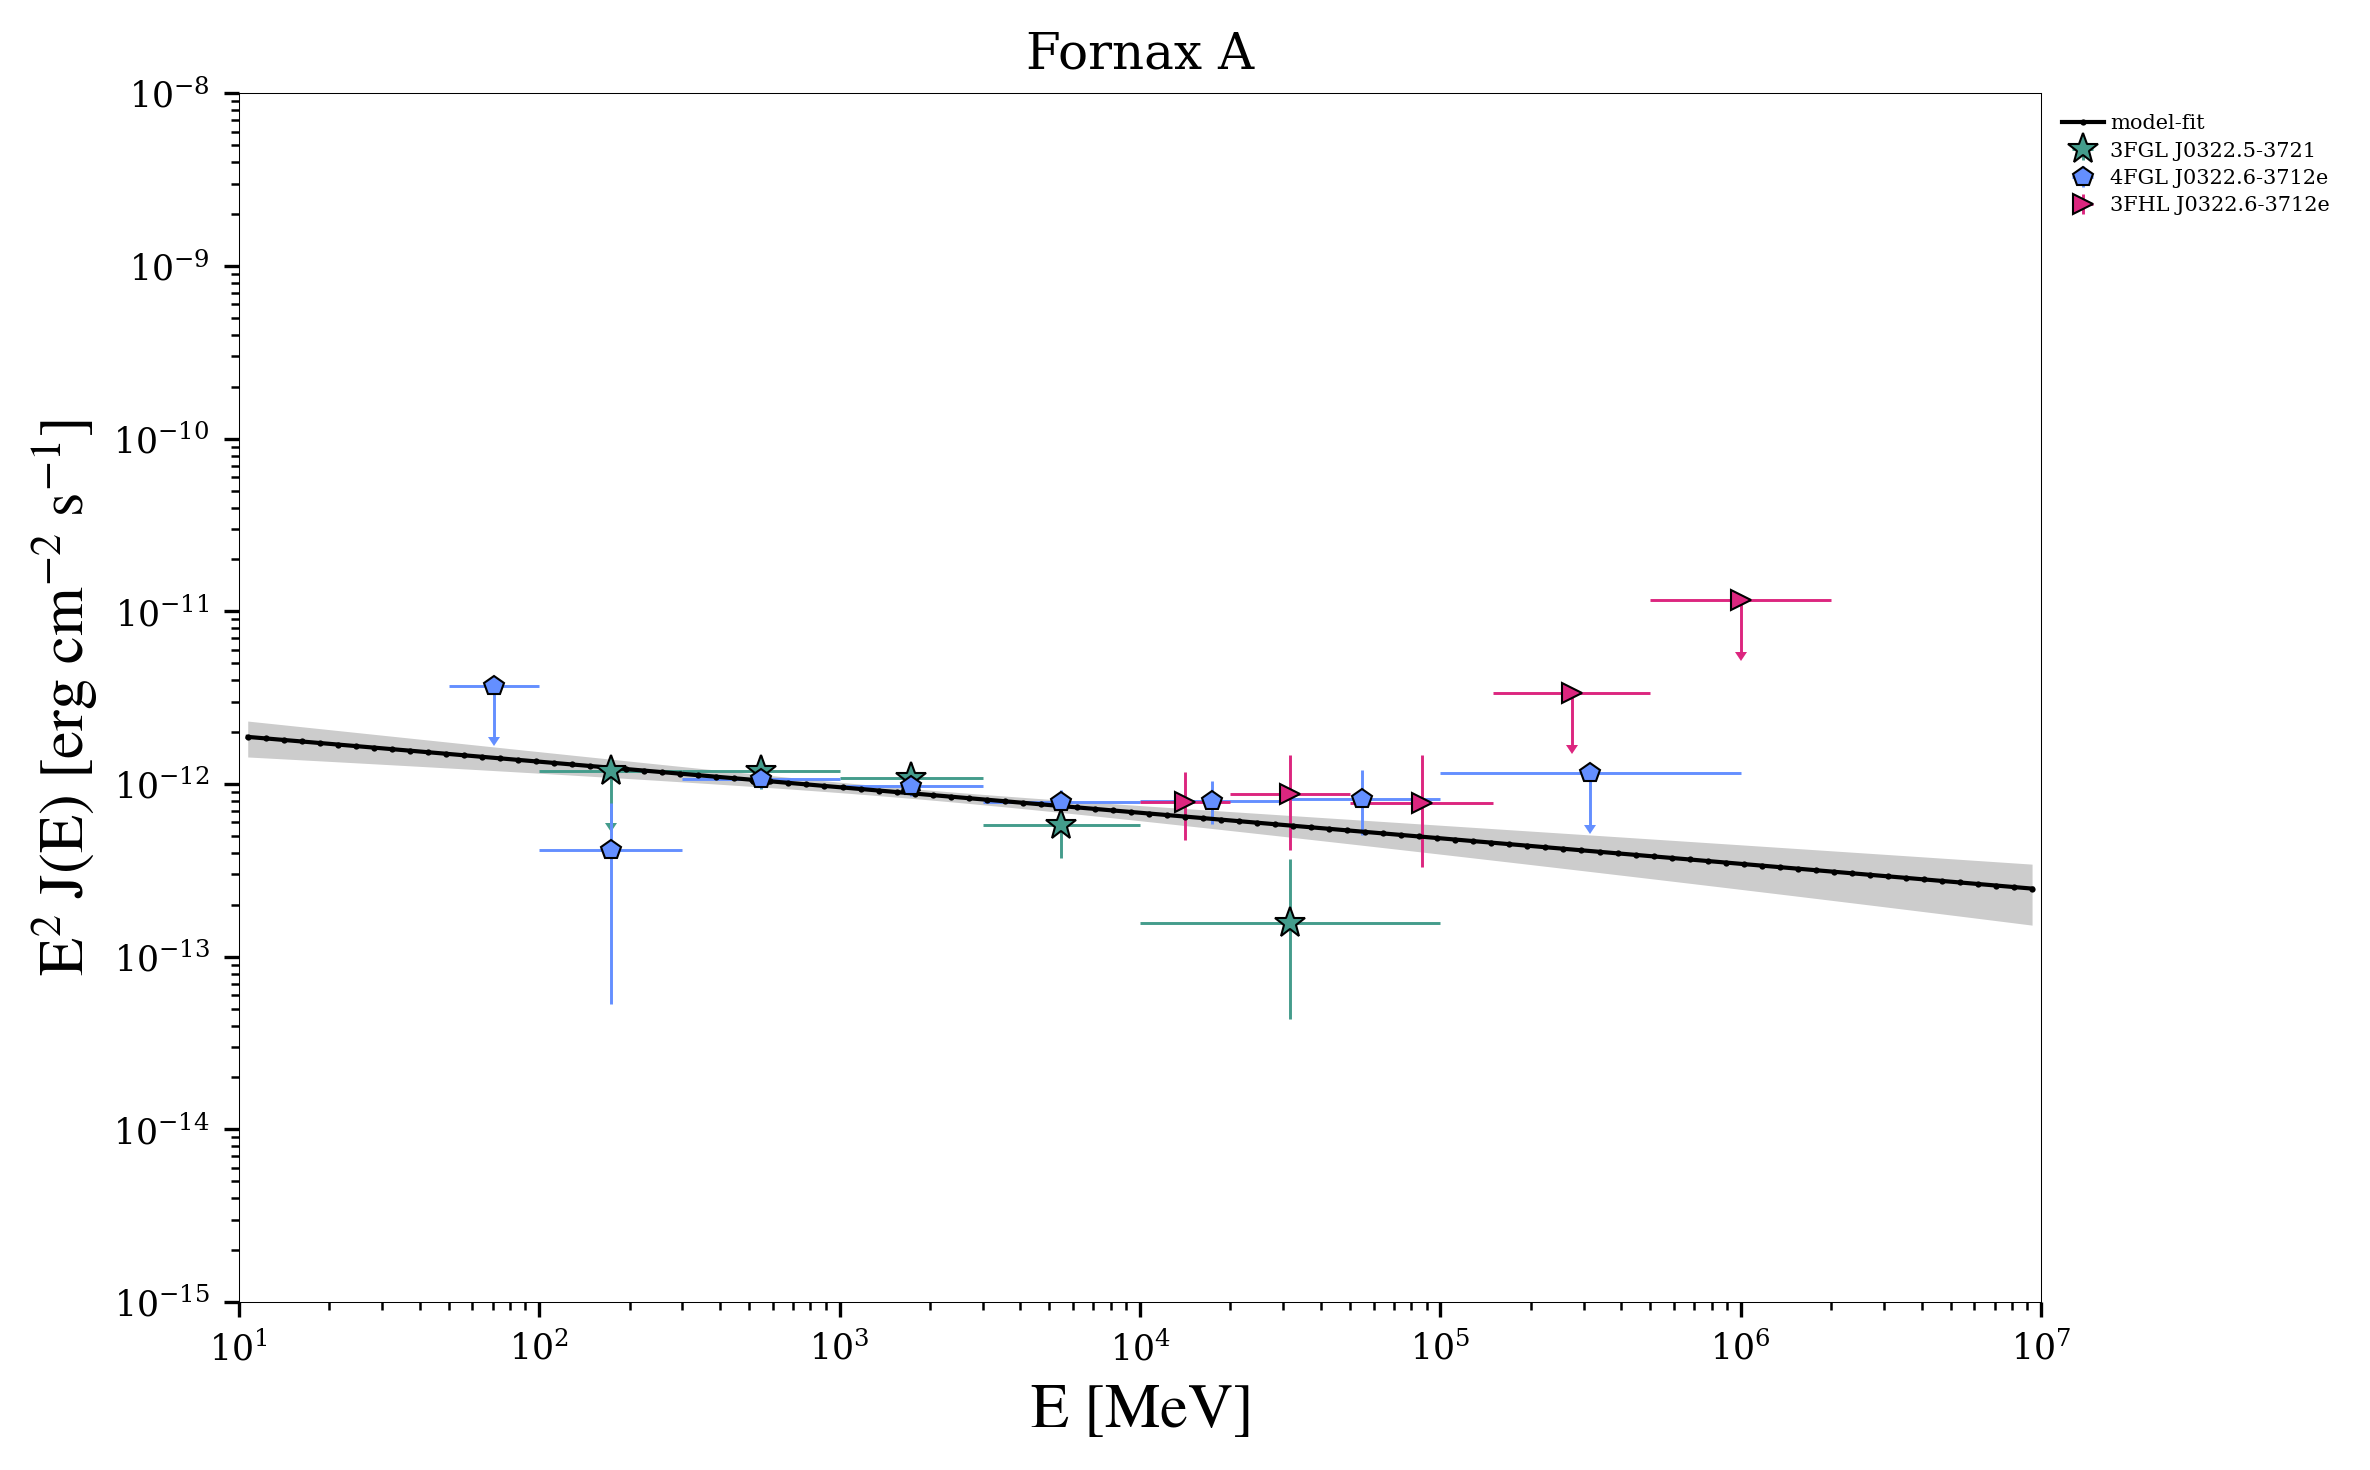

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 

    d.data.plot(
        label=d.name, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
model_fit.spectral_model.plot(energy_bounds=energy_bounds, label=model_fit.name, color="k", **kwargs)
model_fit.spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(loc='upper left', ncol=1, fontsize=5, bbox_to_anchor=(1,1))

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/SED_HE_{name_file}")
plt.show()


In [73]:
analysis.datasets.models = models

In [74]:
datasets.models = models

In [75]:
datasets.extend(datasets_VizieR)
analysis.datasets = datasets

In [76]:
display(models['model-fit'].parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.1479e+00,,4.432e-02,nan,nan,False,False,
spectral,amplitude,1.7451e-13,MeV-1 s-1 cm-2,1.133e-14,nan,nan,False,True,
spectral,reference,1.7758e+03,MeV,0.000e+00,nan,nan,True,False,


In [77]:
display(datasets.models['model-fit'].parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.1479e+00,,4.432e-02,nan,nan,False,False,
spectral,amplitude,1.7451e-13,MeV-1 s-1 cm-2,1.133e-14,nan,nan,False,True,
spectral,reference,1.7758e+03,MeV,0.000e+00,nan,nan,True,False,


In [78]:
datasets.models[0]

SkyModel(spatial_model=None, spectral_model=<gammapy.modeling.models.spectral.PowerLawSpectralModel object at 0x702f54b66040>)temporal_model=None)

In [80]:
config.write(path=f'{outdir}/config.yaml', overwrite=True)

In [42]:
# config.read(config.general.config_file)

In [81]:
datasets.write(filename=config.general.datasets_file, filename_models=config.general.models_file, overwrite=True)

In [82]:
!jupyter nbconvert counterparts.ipynb  --to notebook --output 'counterparts_{source_name}' --output-dir '.'

[NbConvertApp] Converting notebook counterparts.ipynb to notebook
[NbConvertApp] Writing 1111728 bytes to counterparts_Fornax A.ipynb


In [ ]:
convert_ipynb_to_gallery('counterparts.ipynb', output_file_name=f'{outdir}/counterparts_{source_name}')